In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

Data frames for states

In [2]:
dfCases = pd.read_csv('../data/Casos_Diarios_Municipio_Confirmados_20210621.csv')

Determinating the size of the cases dataframe

In [3]:
numStates,locLastDateCases=dfCases.shape

Remove the national numbers from the dataframes

In [4]:
dfCases = dfCases.query("nombre != 'Nacional'").copy()

Top 10 states with high populations

In [5]:
dfCases['total_cases'] = dfCases.iloc[:,3:locLastDateCases].sum(axis=1)

In [6]:
dfCases['cases_rate'] = (dfCases['total_cases']/dfCases['poblacion'])*100000

In [7]:
dfCases['total_cases_last_60_days'] = dfCases.iloc[:,locLastDateCases-59:locLastDateCases].sum(axis=1)

In [8]:
dfCases['cases_rate_last_60_days'] =(dfCases['total_cases_last_60_days']/ dfCases['poblacion'])*100000 #using as reference the las day

In [9]:
dfCasesInfo = dfCases.loc[:,['nombre','poblacion','total_cases','cases_rate','total_cases_last_60_days','cases_rate_last_60_days']].copy()

Covid deaths analyzes

In [10]:
dfDeaths = pd.read_csv('../data/Casos_Diarios_Municipio_Defunciones_20210621.csv')

Determinating the size of the deaths dataframe

In [11]:
numStates,locLastDateDeaths=dfDeaths.shape

Remove the national numbers from the dataframes

In [12]:
dfDeaths = dfDeaths.query("nombre != 'Nacional'").copy()

In [13]:
dfDeaths['total_deaths'] = dfDeaths.iloc[:,3:locLastDateDeaths].sum(axis=1)

In [14]:
dfDeaths['deaths_rate'] = (dfDeaths['total_deaths']/dfDeaths['poblacion'])*100000 #total/population*100,000

In [15]:
dfDeaths['deaths_rate'] = (dfDeaths['total_deaths']/dfDeaths['poblacion'])*100000 #total/population*100,000

In [16]:
dfDeaths['total_deaths_last_60_days'] = dfDeaths.iloc[:,locLastDateDeaths-59:locLastDateDeaths].sum(axis=1)

In [17]:
dfDeaths['deaths_rate_last_60_days'] = (dfDeaths.loc[:,'total_deaths_last_60_days']/dfDeaths.loc[:,'poblacion'])*100000

In [18]:
dfCases.rename(columns = {'nombre': 'municipalitie', 'poblacion': 'population'}, inplace=True)
dfDeaths.rename(columns = {'nombre': 'municipalitie', 'poblacion': 'population'}, inplace=True)

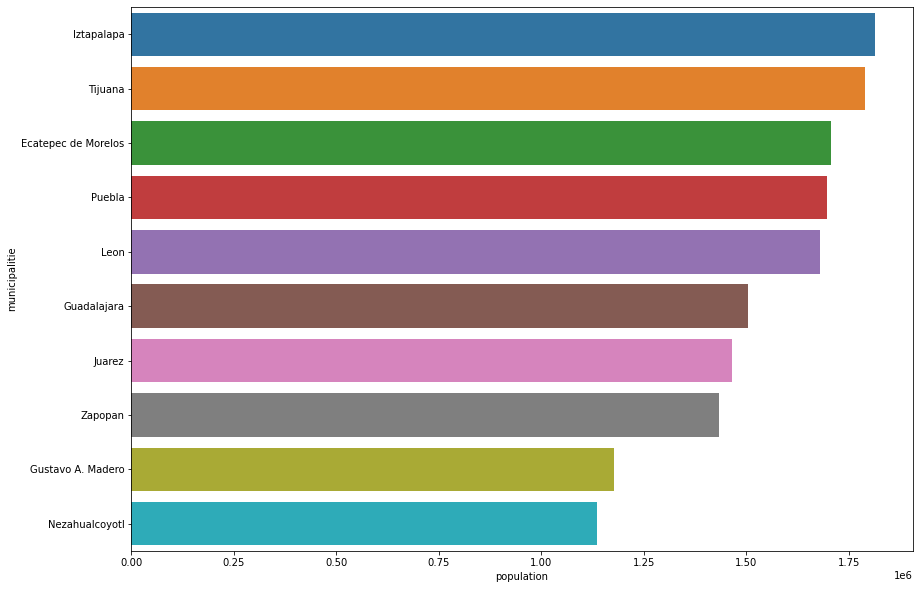

In [19]:
plt.figure(figsize=(14,10))
top10largestPopulations = sns.barplot(x="population", y="municipalitie", data=dfCases.nlargest(10, 'population').copy())
top10largestPopulations = top10largestPopulations.get_figure()
sns.set_context('paper', font_scale=2)
top10largestPopulations.savefig("../resultsMunicipalities/top10largestPopulations.png")

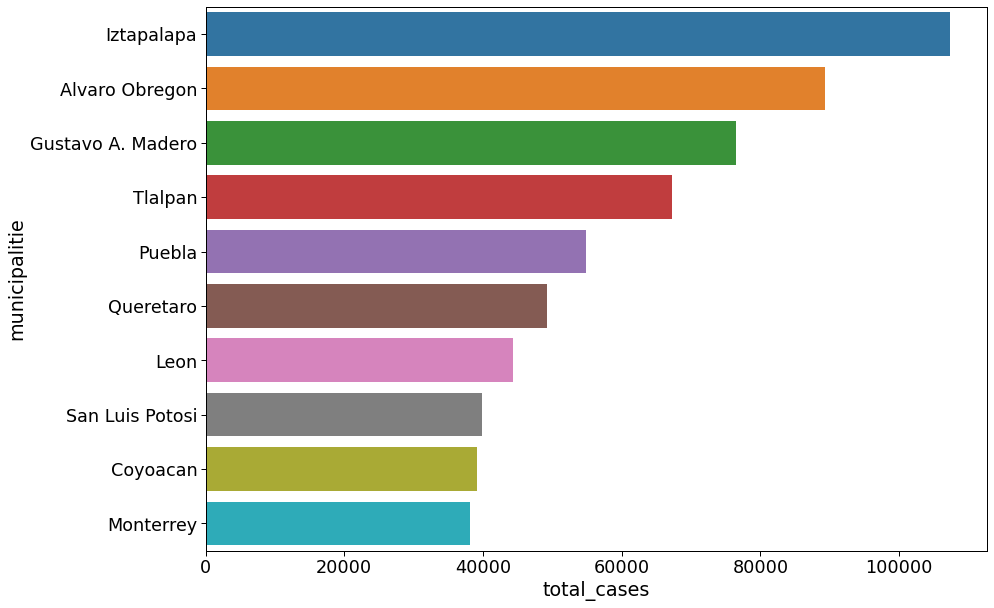

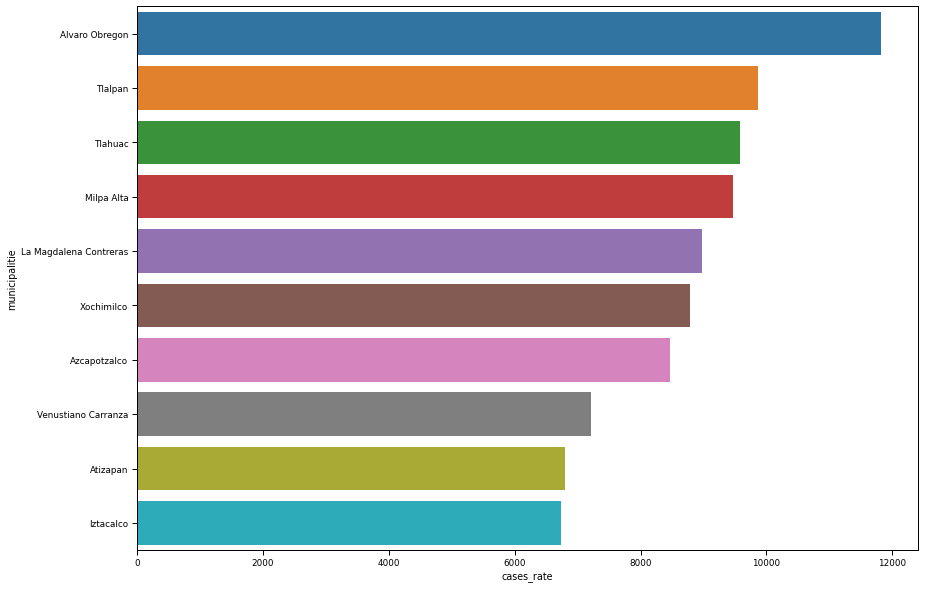

In [20]:
dfCasesSorted = dfCases
dfCasesSorted.sort_values('total_cases',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
totalCases = sns.barplot(x="total_cases", y="municipalitie", data=dfCasesSorted.nlargest(10, 'total_cases').copy())
totalCases = totalCases.get_figure()
sns.set_context('paper', font_scale=1)
totalCases.savefig("../resultsMunicipalities/total_cases.png")

dfCasesSorted.sort_values('cases_rate',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
casesRate = sns.barplot(x="cases_rate", y="municipalitie", data=dfCasesSorted.nlargest(10, 'cases_rate').copy())
sns.set_context('paper', font_scale=0.75) 
casesRate = casesRate.get_figure()
casesRate.savefig("../resultsMunicipalities/cases_rate.png")

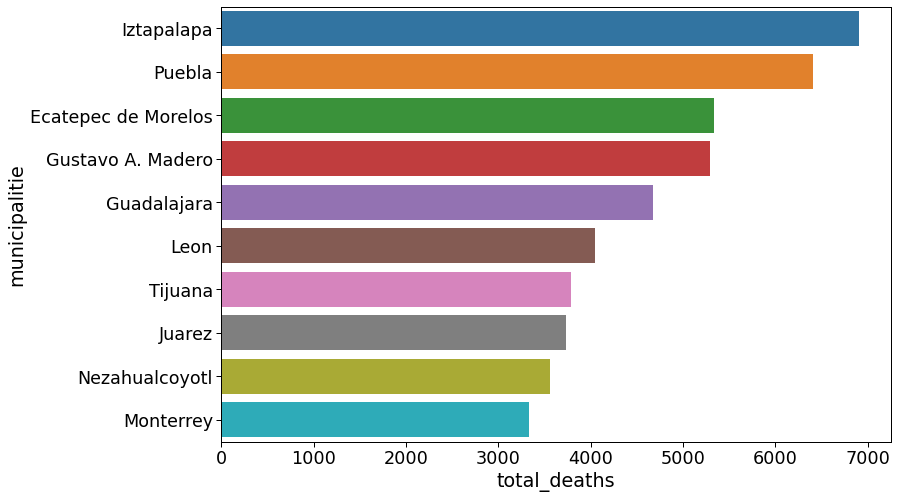

In [34]:
dfDeathsSorted = dfDeaths
dfDeathsSorted.sort_values('total_deaths',inplace=True, ascending=False)
plt.figure(figsize=(12,8))
totalDeaths = sns.barplot(x="total_deaths", y="municipalitie", data=dfDeathsSorted.nlargest(10, 'total_deaths').copy())
totalDeaths = totalDeaths.get_figure()
sns.set_context('paper', font_scale=1) 
totalDeaths.savefig("../resultsMunicipalities/total_deaths.png")

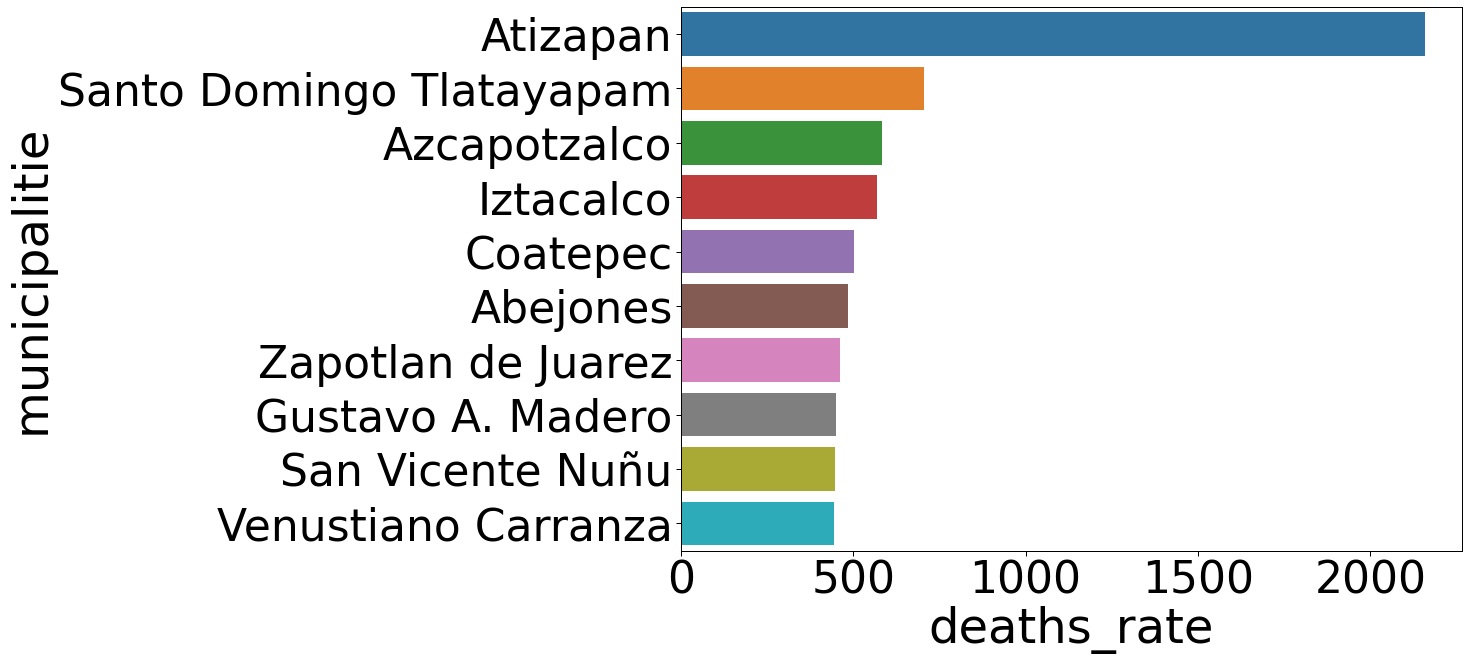

In [22]:
dfDeathsSorted.sort_values('deaths_rate',inplace=True, ascending=False)
plt.figure(figsize=(14,10))
deathsRate = sns.barplot(x="deaths_rate", y="municipalitie", data=dfDeathsSorted.nlargest(10, 'deaths_rate').copy())
deathsRate = deathsRate.get_figure()
sns.set_context('paper', font_scale=0.5)
deathsRate.savefig("../resultsMunicipalities/cases_rate.png")

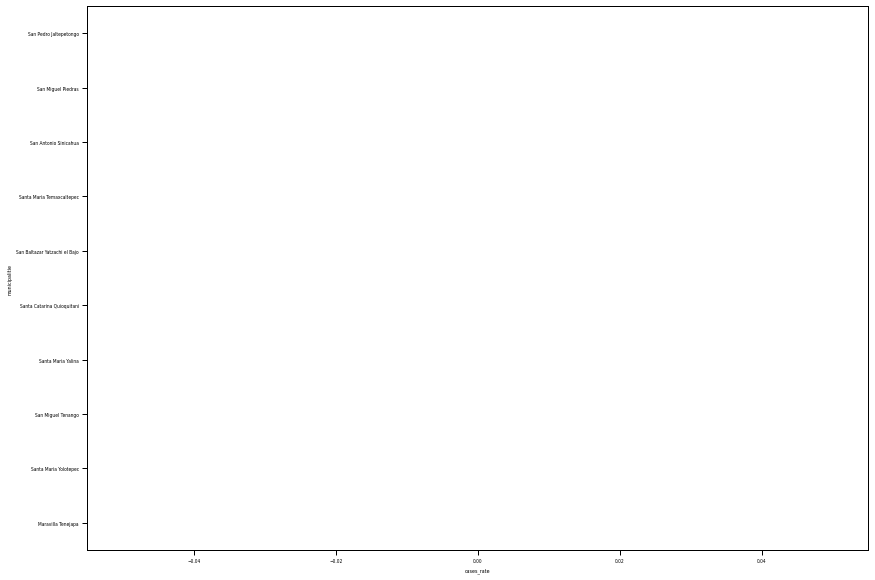

In [23]:

plt.figure(figsize=(14,10))
top10smallestCasesRate = sns.barplot(x="cases_rate", y="municipalitie", data=dfCases.nsmallest(10, 'cases_rate').copy())
top10smallestCasesRate = top10smallestCasesRate.get_figure()
sns.set_context('paper', font_scale=2)
top10smallestCasesRate.savefig("../resultsMunicipalities/top10smallestCasesRate.png")

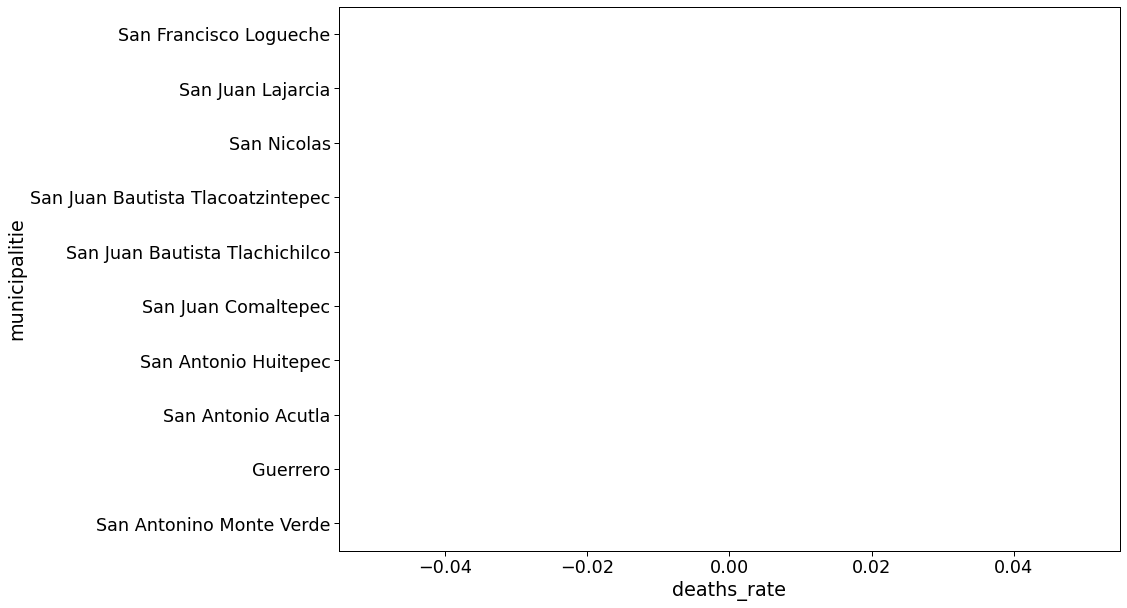

In [24]:

plt.figure(figsize=(14,10))
top10smallestDeathsRate = sns.barplot(x="deaths_rate", y="municipalitie", data=dfDeaths.nsmallest(10, 'deaths_rate').copy())
top10smallestDeathsRate = top10smallestDeathsRate.get_figure()
sns.set_context('paper', font_scale=2)
top10smallestDeathsRate.savefig("../resultsMunicipalities/top10smallestDeathsRate.png")

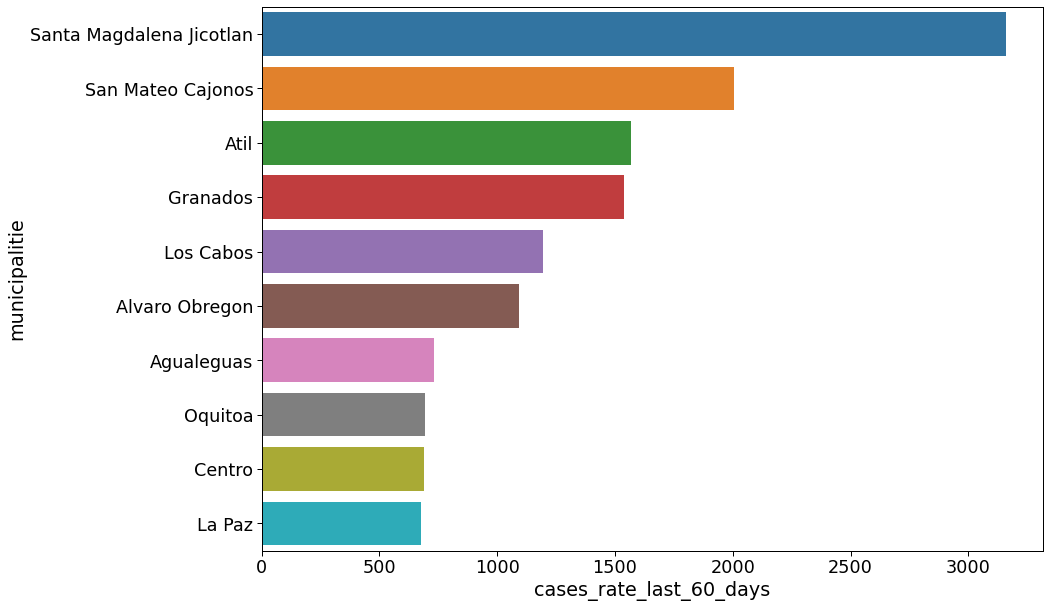

In [25]:
plt.figure(figsize=(14,10))
top10casesRate60 = sns.barplot(x="cases_rate_last_60_days", y="municipalitie", data=dfCases.nlargest(10,'cases_rate_last_60_days').copy())
sns.set_context('paper', font_scale=2)
top10casesRate60 = top10casesRate60.get_figure()
top10casesRate60.savefig("../resultsMunicipalities/top10casesRateLast60days.png")

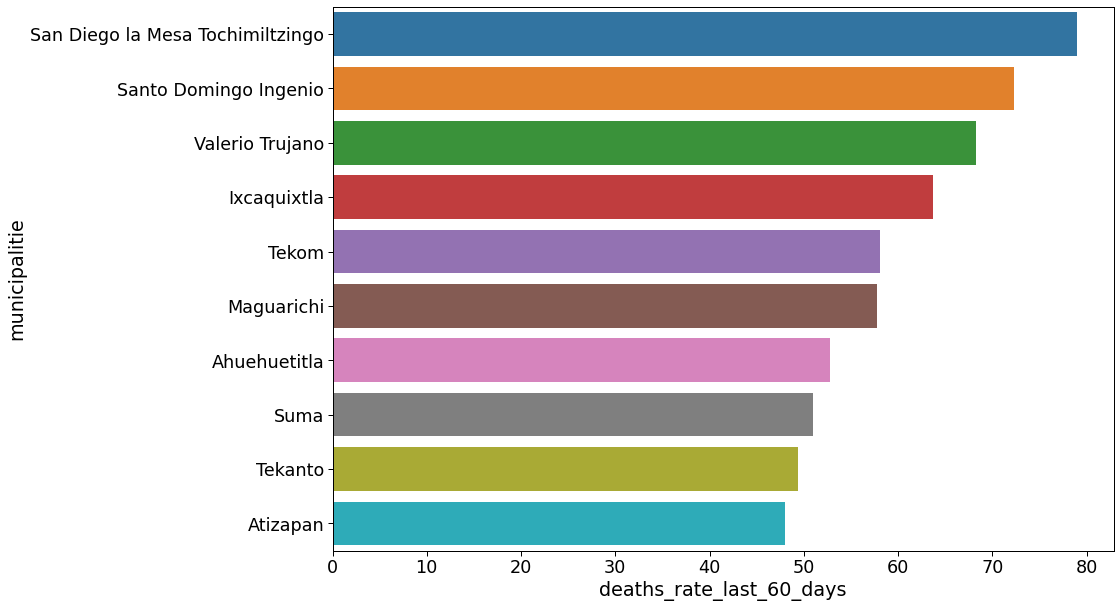

In [26]:
plt.figure(figsize=(14,10))
top10deathsRate60 = sns.barplot(x="deaths_rate_last_60_days", y="municipalitie", data=dfDeaths.nlargest(10,'deaths_rate_last_60_days').copy())
top10deathsRate60 = top10casesRate60.get_figure()        
sns.set_context('paper', font_scale=2)
top10deathsRate60 = top10deathsRate60.savefig("../resultsMunicipalities/top10deathsRateLast60days.png")

In [27]:
dfAll = pd.merge(dfCases,dfDeaths,on='municipalitie')

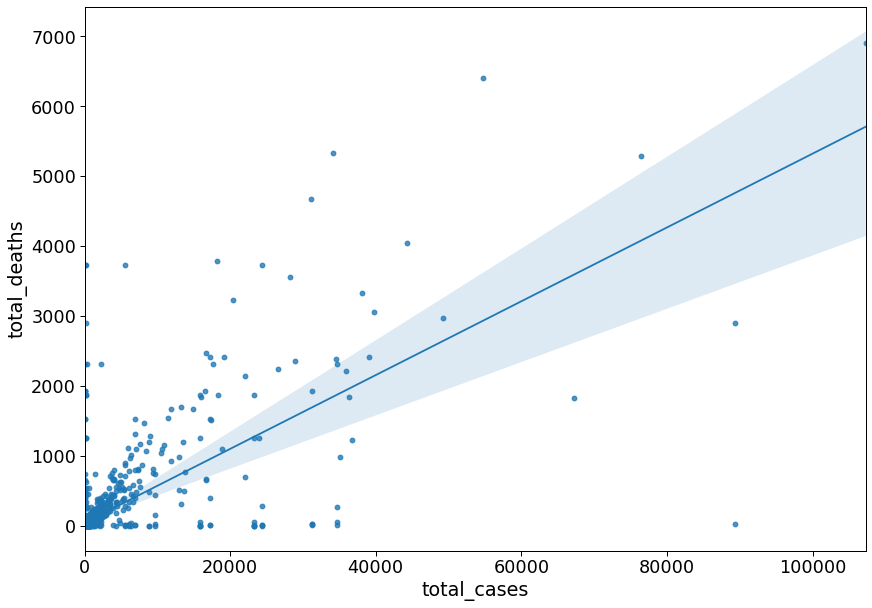

In [28]:
plt.figure(figsize=(14,10))
totalCasesDeaths = sns.regplot(x="total_cases", y="total_deaths", data=dfAll)
totalCasesDeaths = totalCasesDeaths.get_figure()
sns.set_context('paper', font_scale=2)
totalCasesDeaths.savefig("../resultsMunicipalities/totalDeaths-totalDeaths.png")

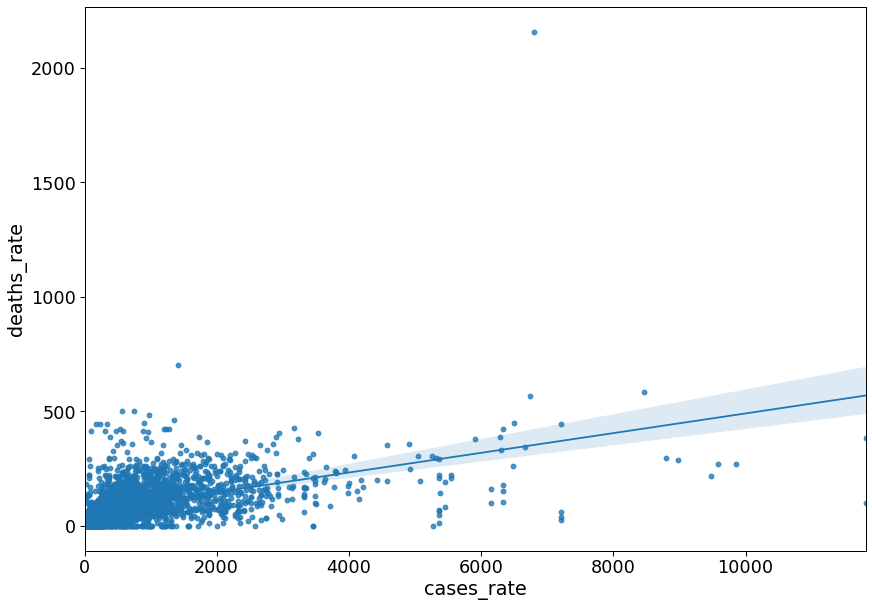

In [29]:
plt.figure(figsize=(14,10))
casesDeathsRate = sns.regplot(x="cases_rate", y="deaths_rate", data=dfAll)
casesDeathsRate = casesDeathsRate.get_figure()
sns.set_context('paper', font_scale=2)
casesDeathsRate.savefig("../resultsMunicipalities/deathsRate-casesRate.png")

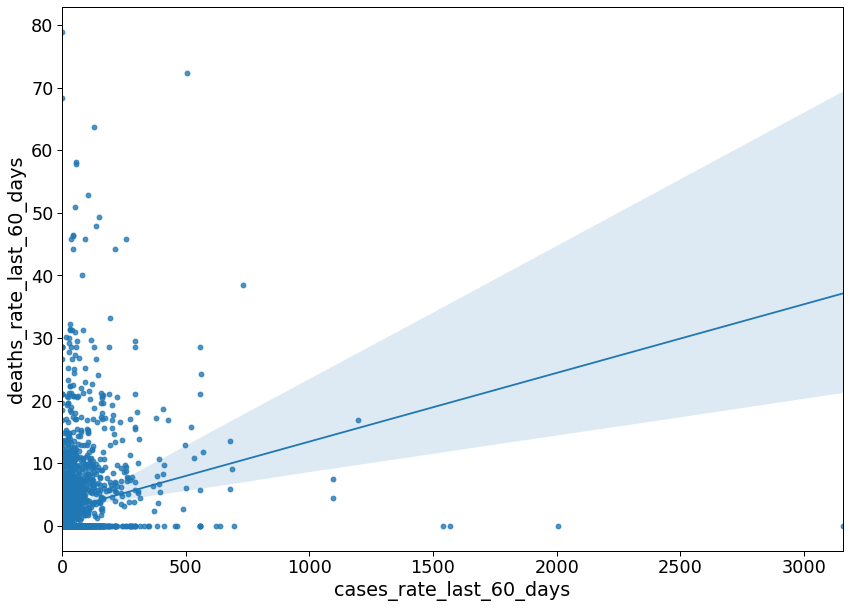

In [30]:
plt.figure(figsize=(14,10))
deathsCasesRate60 = sns.regplot(x="cases_rate_last_60_days", y="deaths_rate_last_60_days", data=dfAll)
deathsCasesRate60  = deathsCasesRate60 .get_figure()
sns.set_context('paper', font_scale=2)
deathsCasesRate60.savefig("../resultsMunicipalities/deathsRate60-casesRate60.png")


In [31]:
dfFinal = dfAll.loc[:,['municipalitie','population_x','total_cases','cases_rate','cases_rate_last_60_days','total_deaths','deaths_rate','deaths_rate_last_60_days']].copy()

In [32]:
dfFinal.rename(columns = {'nombre': 'municipalitie', 'population_x': 'population'}, inplace=True)
dfFinal.sort_values(by=['municipalitie'], ascending = True, inplace=True)
dfFinal

,municipalitie,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
1291,Abala,7035,57,810.234542,28.429282,10,142.146411,0.000000
1109,Abasolo,12768,46,360.275689,62.656642,4,31.328321,0.000000
1107,Abasolo,12768,46,360.275689,62.656642,92,96.253439,1.046233
1106,Abasolo,12768,46,360.275689,62.656642,3,102.810144,0.000000
1105,Abasolo,1130,7,619.469027,0.000000,4,31.328321,0.000000
...,...,...,...,...,...,...,...,...
2654,Zoquiapan,2583,2,77.429346,38.714673,0,0.000000,0.000000
2790,Zoquitlan,19699,6,30.458399,5.076400,3,15.229199,0.000000
2689,Zozocolco de Hidalgo,15708,10,63.661828,6.366183,2,12.732366,0.000000
1744,Zumpahuacan,17962,88,489.923171,5.567309,16,89.076940,5.567309


In [33]:
#dfFinal.to_csv('../data/week1analyzes.csv',index=False)